# Logistic regression
# KNN
# Naïve is Bayes
# Decision Trees
# SVM


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
df= pd.read_csv('heart_disease.csv')

In [4]:
df.head(20)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [7]:
#Logistic regression, redicts one of two possible outcomes
# 0 or 1
df.target.value_counts()

1    526
0    499
Name: target, dtype: int64

In [8]:
#mean
df.groupby('target').mean()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


Text(0, 0.5, 'Maximum Heart_rate')

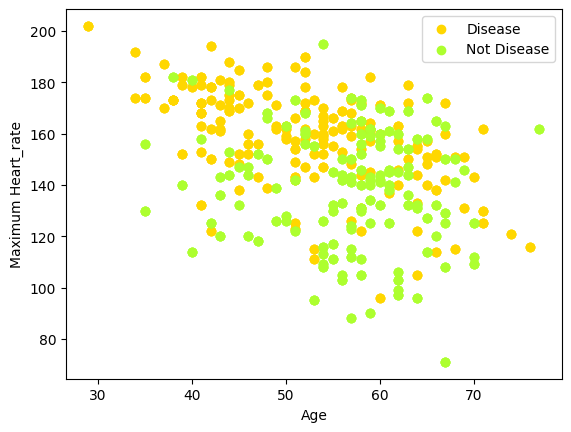

In [12]:
# create a scatter plot diseases versus age and max-heartrate
plt.scatter(x=df.age[df.target==1], y=df.thalach[df.target==1],c='#FFD700', label='Disease')
plt.scatter(x=df.age[df.target==0], y=df.thalach[df.target==0],c='#ADFF2F', label='Not Disease')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Maximum Heart_rate')

In [13]:
#Logistic regression for classification
# depent variable
# independent variable

y= df.target.values
X_data=df.drop(['target'], axis=1)

In [14]:
# Normalise the data
x=(X_data-np.min(X_data))/(np.max(X_data))-np.min(X_data)

C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [15]:
# split data 
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=0)


In [16]:
#transpose matrices
x_train=x_train.T
x_test=x_test.T

y_train=y_train.T
y_test=y_test.T


In [19]:
 accuracies ={}
lr=LogisticRegression()
lr.fit(x_train.T,y_train.T)

acc=lr.score(x_test.T, y_test.T)*100
accuracies['LogisticRegression']=acc

#
print("Test accuracy {:.2f}%" .format(acc))


Test accuracy 86.83%


C:\Users\USER\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
#KNN lassifier to get accuracy score
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(x_train.T, y_train.T)

prediction=knn.predict(x_test.T)
print('{} NN score {:.2f}%'.format(2, knn.score(x_test.T, y_test.T)*100 ))


2 NN score 100.00%


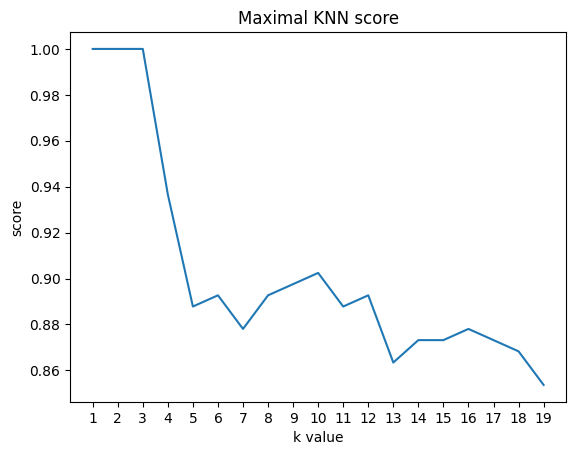

maximum KNN score is 100.00%


In [33]:
# max knn score for module
score_list=[]
for i in range(1,20):
    knn2=KNeighborsClassifier(n_neighbors=i)
    knn2.fit(x_train.T,y_train.T)
    score_list.append(knn2.score(x_test.T, y_test.T))

    
    #tyg
    
#line plot
plt.plot(range(1,20), score_list)
plt.xticks(np.arange(1,20,1))
plt.xlabel('k value')
plt.ylabel('score')
plt.title('Maximal KNN score')
plt.show()


#Max KNN score in %
acc=max(score_list)*100
accuracies['KNN']=acc
print('maximum KNN score is {:.2f}%'.format(acc))

In [34]:
# SVM
from sklearn.svm import SVC
svm=SVC(random_state=1)
svm.fit(x_train.T, y_train.T )

acc=svm.score(x_train.T, y_train.T)*100
accuracies['SVM']=acc
print('test accuracy of SVM : {:.2f}%'.format(acc))

test accuracy of SVM : 51.10%


In [28]:
# Accuracy  from Naïve Bayes
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train.T, y_train.T)

acc=nb.score(x_test.T, y_test)*100
accuracies['Naïve Bayes']=acc
print("Accuracy of Naive Bayes: {:.2f}%".format(acc))


Accuracy of Naive Bayes: 85.37%


In [29]:
# DEcision tree
from sklearn.tree import DecisionTreeClassifier
dtr=DecisionTreeClassifier()
dtr.fit(x_train.T, y_train.T)

acc=dtr.score(x_test.T, y_test.T)*100
accuracies['Decision Tree']=acc
print('Decision tree accuracy {:.2f}%'.format(acc))


Decision tree accuracy 100.00%


In [31]:
# Accuracy from random forest classifier
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators=1000, random_state=1)
rf.fit(x_train.T, y_train.T)

acc=rf.score(x_test.T, y_test.T)*100
accuracies['Random Forest']=acc

print("Rand forest accuracy is {:.2f}%".format(acc))

Rand forest accuracy is 100.00%


<AxesSubplot: title={'center': 'Comapre accuracies of models '}, xlabel='ML model algorithm', ylabel='Accuracies %'>

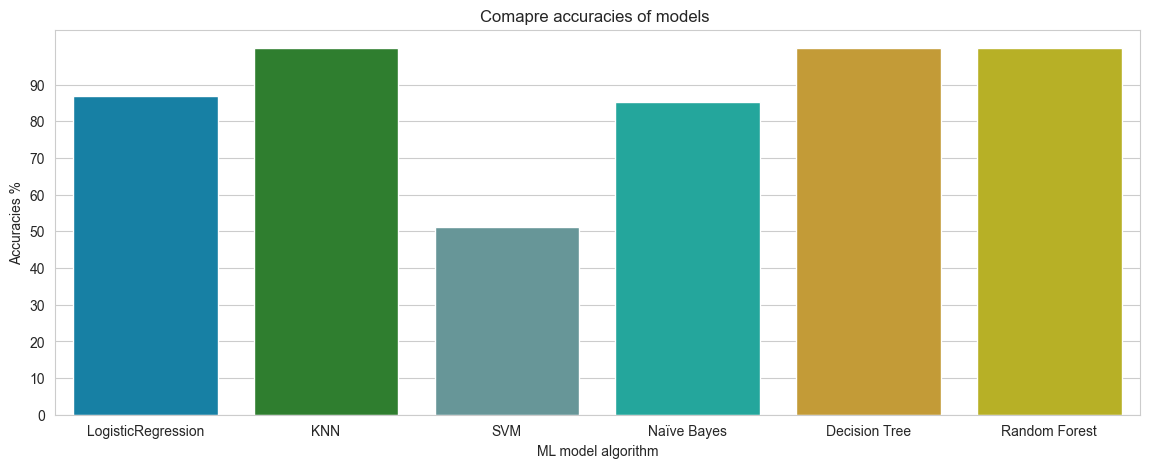

In [42]:
# Comapre accuracies of models 
# colors=["#008BBB","#228B22", "#5F9EA0","#0FBBAE","DAA520","CFC60E"]

colors = ['#008BBB', '#228B22', '#5F9EA0', '#0FBBAE', '#DAA520', '#CFC60E']

sns.set_style('whitegrid')
plt.figure(figsize=(14,5))
plt.yticks(np.arange(0,100,10))
plt.ylabel("Accuracies %")
plt.title("Comapre accuracies of models ")
plt.xlabel("ML model algorithm")
sns.barplot(x=list(accuracies.keys()), y=list(accuracies.values()), palette=colors)

In [43]:
# Confusion Matrix 
# Evaluates performance of a classification model

#Predicted vals
y_head_lr=lr.predict(x_test.T)
knn3=KNeighborsClassifier(n_neighbors=3)
knn3.fit(x_train.T, y_train.T)
y_head_knn=knn3.predict(x_test.T)
y_head_svm=svm.predict(x_test.T)
y_head_nb=nb.predict(x_test.T)
y_head_dtr=dtr.predict(x_test.T)
y_head_rf=rf.predict(x_test.T)


In [44]:
from sklearn.metrics import confusion_matrix

cm_lr=confusion_matrix(y_test, y_head_lr)
cm_knn=confusion_matrix(y_test, y_head_knn)
cm_svm=confusion_matrix(y_test, y_head_svm)
cm_nb=confusion_matrix(y_test, y_head_nb)
cm_dtr=confusion_matrix(y_test, y_head_dtr)
cm_rf=confusion_matrix(y_test, y_head_rf)

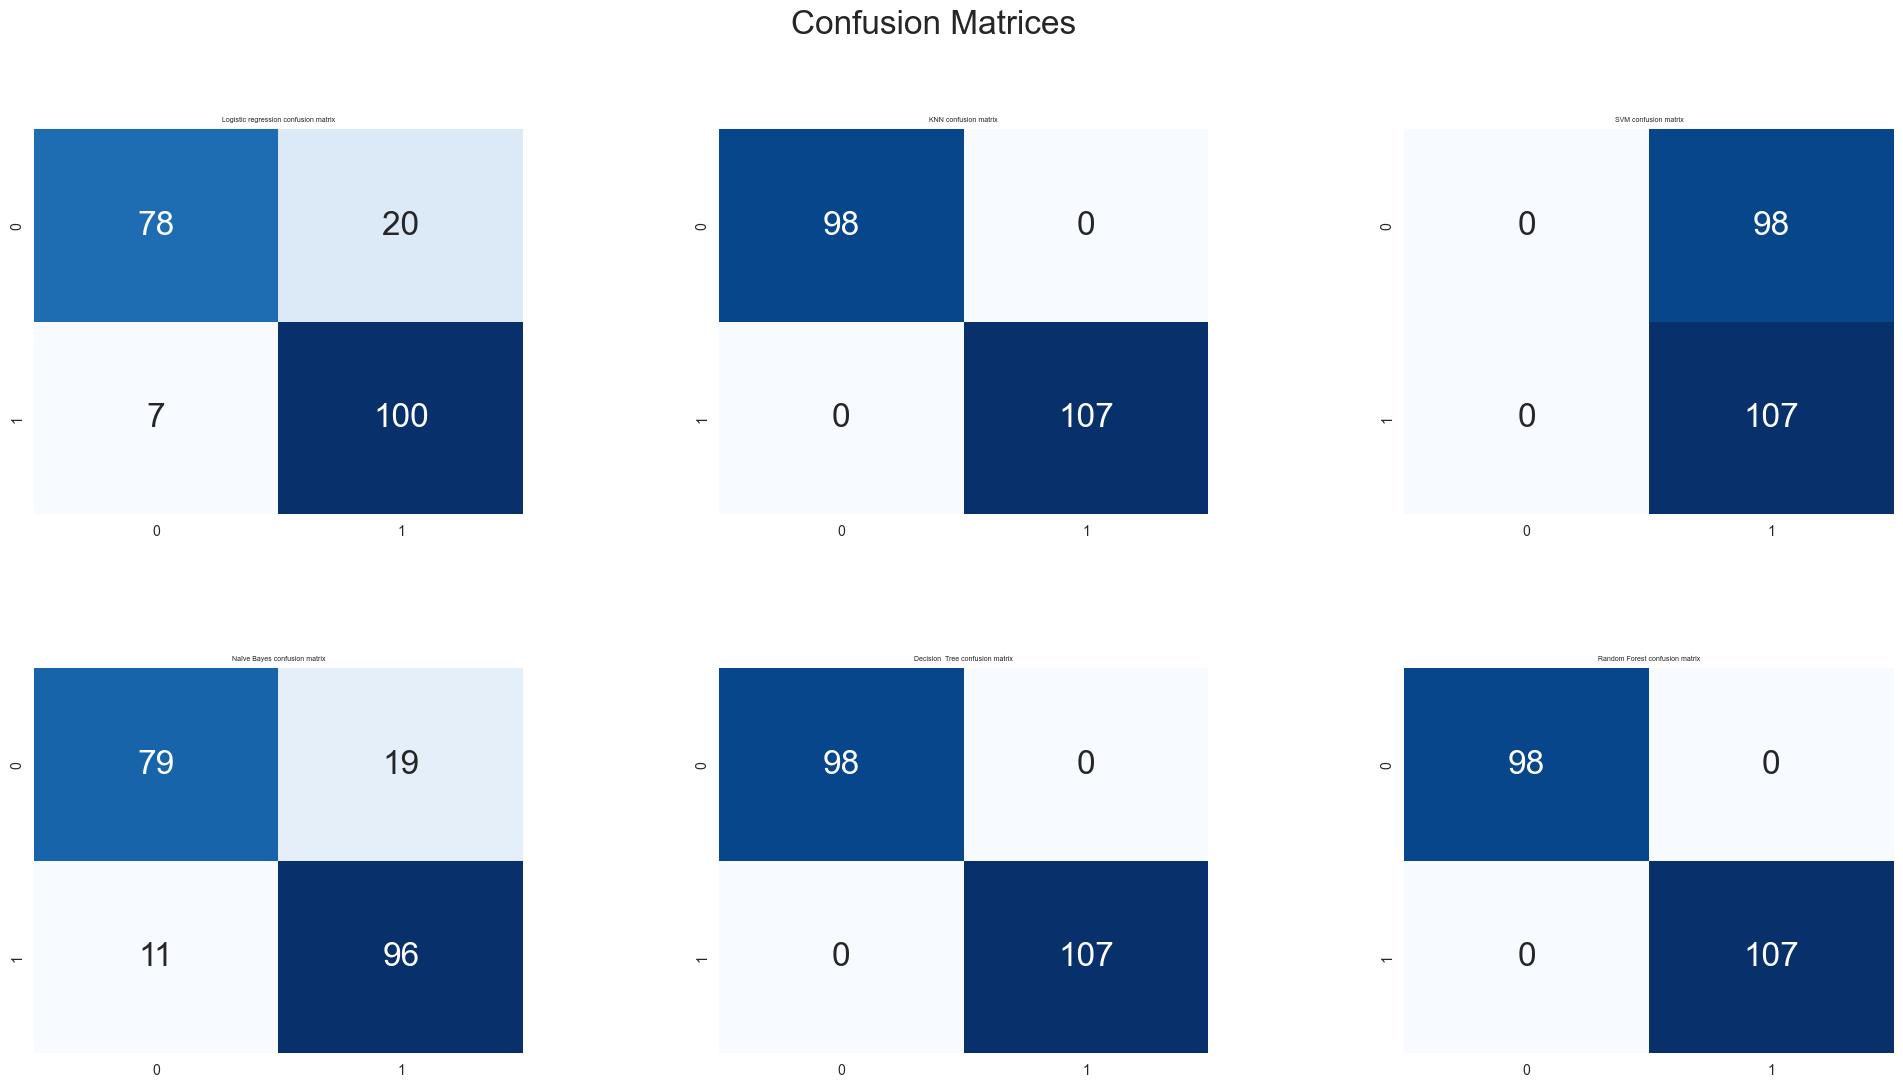

In [60]:
# Heatmap using  confusion matrix
plt.figure(figsize=(24,12))
plt.suptitle("Confusion Matrices", fontsize=24)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

# Heatmap for logistic regression
plt.subplot(2,3,1)
plt.title("Logistic regression confusion matrix", fontsize=5 )
sns.heatmap(cm_lr, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size': 24})


# Heatmap for KNN
plt.subplot(2,3,2)
plt.title("KNN confusion matrix", fontsize=5 )
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size': 24})


# Heatmap for SVM
plt.subplot(2,3,3)
plt.title("SVM confusion matrix", fontsize=5 )
sns.heatmap(cm_svm, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size': 24})


# Heatmap for Naïve Bayes 
plt.subplot(2,3,4)
plt.title("Naïve Bayes confusion matrix", fontsize=5 )
sns.heatmap(cm_nb, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size': 24})



# Heatmap for Decision  Tree  
plt.subplot(2,3,5)
plt.title("Decision  Tree confusion matrix", fontsize=5 )
sns.heatmap(cm_dtr, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size': 24})



# Heatmap for Random Forest    
plt.subplot(2,3,6)
plt.title("Random Forest confusion matrix", fontsize=5 )
sns.heatmap(cm_rf, annot=True, cmap='Blues', fmt='d', cbar=False, annot_kws={'size': 24})


plt.show()